In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_score, roc_auc_score, roc_curve

# Predicting Employee Attrition Using Logistic Regression

In [ ]:
from google.colab import files
files.upload()

Saving HR-Employee-Attrition.csv to HR-Employee-Attrition.csv


{'HR-Employee-Attrition.csv': b'\xef\xbb\xbfAge,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager\r\n41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5\r\n49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7\r\n37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2

In [ ]:
employee_data = pd.read_csv("HR-Employee-Attrition.csv")
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
employee_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
employee_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
employee_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
cat_features = employee_data.select_dtypes(include=['object']).columns
employee_data = pd.get_dummies(employee_data, cat_features, drop_first=True)

In [ ]:
num_features = employee_data.select_dtypes(include=['number']).columns
scaler = StandardScaler()
employee_data[num_features] = scaler.fit_transform(employee_data[num_features])

In [ ]:
employee_data.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,1.383138,0.379672,-0.057788,...,False,False,False,False,False,True,False,False,True,True
1,1.322365,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,-0.240677,-1.026167,-0.057788,...,False,False,False,False,True,False,False,True,False,False
2,0.008343,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,1.284725,-1.026167,-0.961486,...,True,False,False,False,False,False,False,False,True,True
3,-0.429664,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,-0.486709,0.379672,-0.961486,...,False,False,False,False,True,False,False,True,False,True
4,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,-1.274014,0.379672,-0.961486,...,True,False,False,False,False,False,False,True,False,False


In [ ]:
employee_data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufactur

In [ ]:
X = employee_data.drop("Attrition_Yes", axis=1)
y = employee_data['Attrition_Yes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
model = LogisticRegression().fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8752834467120182
Precision: 0.7027027027027027
Recall: 0.37142857142857144
F1 Score: 0.485981308411215


# Classifying Credit Card Fraud Using Decision Trees


In [ ]:
from google.colab import files
files.upload()

Saving creditcard.csv to creditcard.csv


In [ ]:
creditcard_df = pd.read_csv('creditcard.csv')
creditcard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
creditcard_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
creditcard_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
creditcard_df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

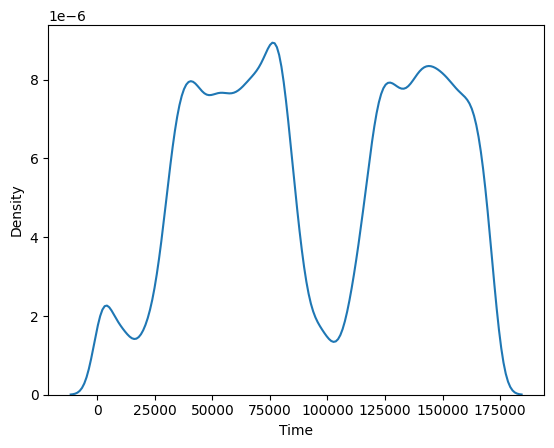

In [ ]:
sns.kdeplot(creditcard_df['Time'])
plt.show()

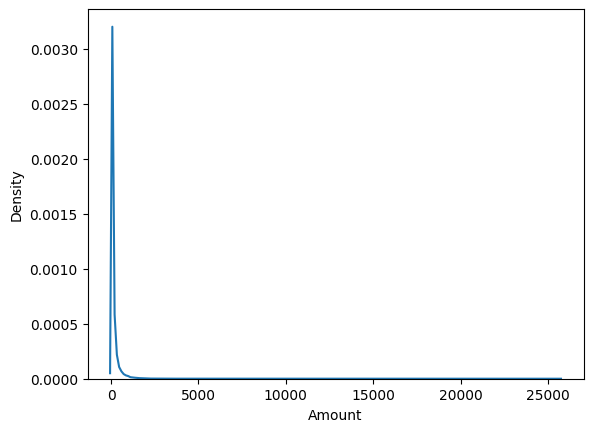

In [ ]:
sns.kdeplot(creditcard_df['Amount'])
plt.show()

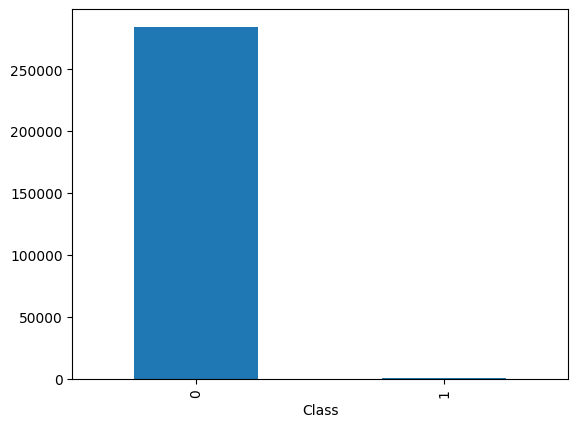

In [ ]:
creditcard_df['Class'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
X = creditcard_df.drop('Class', axis=1)
y = creditcard_df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
DT_model = DecisionTreeClassifier()

In [ ]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_predicted = DT_model.predict(X_test)

In [ ]:
roc_auc = roc_auc_score(y_test, y_predicted)
conf_matrix = confusion_matrix(y_test, y_predicted)

print(f"ROC-AUC: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")

ROC-AUC: 0.9070444174170041
Confusion Matrix:
[[85251    41]
 [   28   123]]


# Predicting Heart Disease Using Logistic Regression


In [ ]:
from google.colab import files
files.upload()

Saving heart_disease_data.csv to heart_disease_data.csv


{'heart_disease_data.csv': b'\xef\xbb\xbfage,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42

In [ ]:
heart_data = pd.read_csv('heart_disease_data.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart_data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

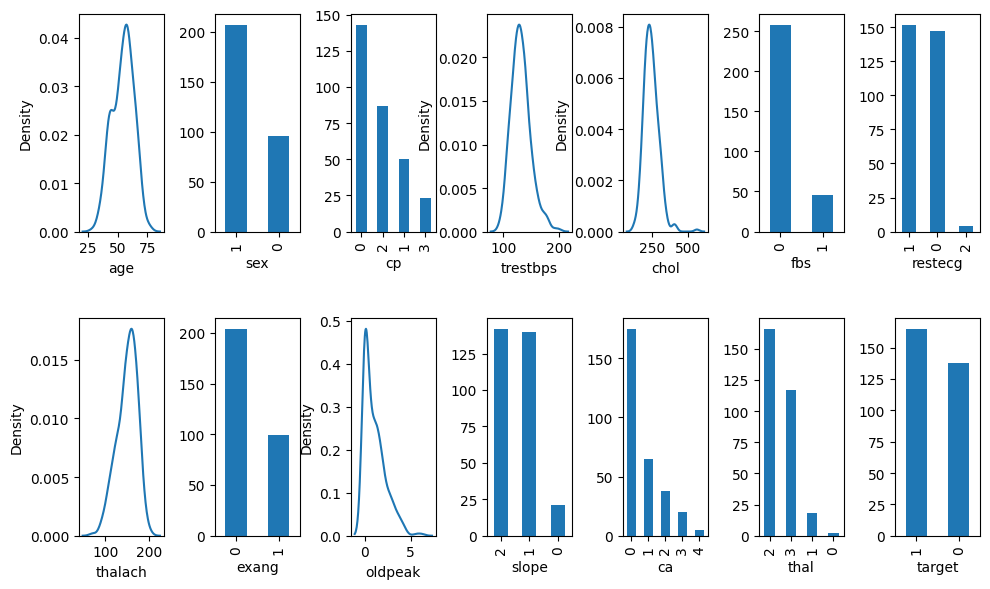

In [ ]:
fig, axes = plt.subplots(2, 7, figsize=(10, 6))
axes = axes.flatten()
for i, col in enumerate(heart_data.columns):
    if heart_data[col].nunique() > 7:
      sns.kdeplot(heart_data[col], ax=axes[i])
    else:
      heart_data[col].value_counts().plot(kind='bar', ax=axes[i])

plt.tight_layout()
plt.subplots_adjust(wspace=0.6, hspace=0.4)
plt.show()

Features are almost normal.

In [ ]:
X = heart_data.drop('target', axis=1)
y = heart_data['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"ROC-AUC: {roc_auc}")
print(f"Accuracy: {accuracy}")

ROC-AUC: 0.8225274725274726
Accuracy: 0.8360655737704918


# Classifying Emails as Spam Using Decision Trees

In [ ]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
email_df = pd.read_csv('emails.csv')
email_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
email_df.isna().sum()

text    0
spam    0
dtype: int64

In [ ]:
y_email = email_df['spam']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_email = vectorizer.fit_transform(email_df['text'])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_email, y_email, test_size=0.3)

In [56]:
model = DecisionTreeClassifier().fit(X_train, y_train)

In [57]:
y_pred = model.predict(X_test)

In [58]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9575334496800465
Precision: 0.9009433962264151
Recall: 0.9249394673123487
F1 Score: 0.9127837514934289


# Predicting Customer Satisfaction Using Logistic Regression

In [60]:
from google.colab import files
files.upload()

Saving Customer-survey-data.csv to Customer-survey-data.csv


{'Customer-survey-data.csv': b'Customer ID,Overall Delivery Experience (Rating),Food Quality (Rating),Speed of Delivery (Rating),Order Accuracy\r\n1,5,3,4,Yes\r\n2,3,4,3,Yes\r\n3,4,5,2,Yes\r\n4,5,3,4,Yes\r\n5,2,5,1,Yes\r\n6,5,2,5,Yes\r\n7,1,4,3,Yes\r\n8,3,3,2,No\r\n9,5,1,3,Yes\r\n10,3,5,3,No\r\n11,5,3,4,Yes\r\n12,2,2,5,Yes\r\n13,4,5,3,No\r\n14,3,4,2,Yes\r\n15,1,5,1,Yes\r\n16,5,4,5,Yes\r\n17,2,2,4,Yes\r\n18,4,5,4,No\r\n19,5,1,5,Yes\r\n20,2,4,4,Yes\r\n21,5,5,1,Yes\r\n22,3,3,3,No\r\n23,1,5,5,Yes\r\n24,5,4,4,Yes\r\n25,3,3,2,Yes\r\n26,2,3,4,Yes\r\n27,2,2,3,No\r\n28,4,5,4,Yes\r\n29,4,1,2,Yes\r\n30,3,4,5,Yes\r\n31,5,5,4,Yes\r\n32,3,3,4,No\r\n33,1,2,5,Yes\r\n34,5,5,1,Yes\r\n35,5,1,2,Yes\r\n36,2,3,3,Yes\r\n37,1,5,4,Yes\r\n38,5,4,3,Yes\r\n39,2,2,4,No\r\n40,3,3,2,Yes\r\n41,5,5,5,Yes\r\n42,3,3,3,Yes\r\n43,4,4,4,Yes\r\n44,5,5,5,Yes\r\n45,2,2,2,Yes\r\n46,5,5,5,Yes\r\n47,1,1,1,Yes\r\n48,3,3,3,No\r\n49,5,5,5,Yes\r\n50,3,3,3,No\r\n51,5,5,5,Yes\r\n52,2,2,2,Yes\r\n53,4,4,4,No\r\n54,3,3,3,Yes\r\n55,1,1,1,

In [61]:
customer_df = pd.read_csv('Customer-survey-data.csv')
customer_df.head()

,Customer ID,Overall Delivery Experience (Rating),Food Quality (Rating),Speed of Delivery (Rating),Order Accuracy
0,1,5.0,3.0,4.0,Yes
1,2,3.0,4.0,3.0,Yes
2,3,4.0,5.0,2.0,Yes
3,4,5.0,3.0,4.0,Yes
4,5,2.0,5.0,1.0,Yes


In [62]:
customer_df.isna().sum()

Customer ID                               0
Overall Delivery Experience (Rating)    418
Food Quality (Rating)                   252
Speed of Delivery (Rating)              239
Order Accuracy                          660
dtype: int64

In [63]:
customer_df.nunique()

Customer ID                             10616
Overall Delivery Experience (Rating)        5
Food Quality (Rating)                       5
Speed of Delivery (Rating)                  5
Order Accuracy                              2
dtype: int64

In [64]:
customer_df['Overall Delivery Experience (Rating)'].fillna(customer_df['Overall Delivery Experience (Rating)'].mode()[0], inplace=True)
customer_df['Food Quality (Rating)'].fillna(customer_df['Food Quality (Rating)'].mode()[0], inplace=True)
customer_df['Speed of Delivery (Rating)'].fillna(customer_df['Speed of Delivery (Rating)'].mode()[0], inplace=True)
customer_df['Order Accuracy'].fillna(customer_df['Order Accuracy'].mode()[0], inplace=True)

In [65]:
customer_df.isna().sum()

Customer ID                             0
Overall Delivery Experience (Rating)    0
Food Quality (Rating)                   0
Speed of Delivery (Rating)              0
Order Accuracy                          0
dtype: int64

In [66]:
encoder = LabelEncoder()
customer_df['Order Accuracy'] = encoder.fit_transform(customer_df['Order Accuracy'])

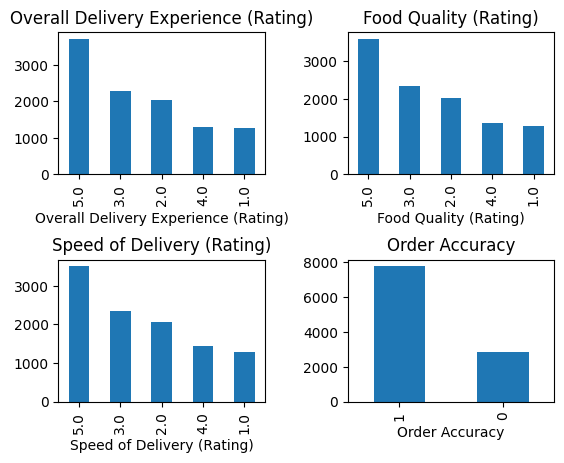

In [67]:
cols_to_plot = ['Overall Delivery Experience (Rating)',	'Food Quality (Rating)',	'Speed of Delivery (Rating)',	'Order Accuracy']
n_cols = int(len(cols_to_plot) / 2)
fig, axes = plt.subplots(2, n_cols)
axes = axes.flatten()
for i, col in enumerate(cols_to_plot):
  customer_df[col].value_counts().plot(kind='bar', ax=axes[i])
  axes[i].set_title(col)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()

In [68]:
LR_model = LogisticRegression()

In [69]:
X_cust = customer_df.drop('Order Accuracy', axis=1)
y_cust = customer_df['Order Accuracy']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_cust, y_cust, test_size=0.3)

In [71]:
LR_model = LogisticRegression().fit(X_train, y_train)

In [73]:
y_pred = LR_model.predict(X_test)

In [74]:
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"ROC-AUC: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")

ROC-AUC: 0.5306977709343309
Confusion Matrix:
[[  99  758]
 [ 126 2202]]
